In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
# This is a short exercise in learning Unsupervised Learning with the Iris dataset!
iris = datasets.load_iris()
#iris.data.shape, iris.target.shape
df = pd.DataFrame(iris.data, columns= iris.feature_names)
#df = pd.DataFrame(iris.data)
#iris.columns = iris.feature_names
df['CLASS'] = iris.target
df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [3]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'CLASS']

In [4]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,CLASS
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
CLASS,0.782561,-0.419446,0.949043,0.956464,1.000000


In [5]:
#df.head(20)
print("Iris data set Description :: ", iris['DESCR'])


Iris data set Description ::  Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Mis

In [6]:
#X = iris.data[:, 2:]  # we only take the last two feat
#X = iris.data
#X = df.loc['sepal_length','sepal_width']
X = df[['sepal_length','sepal_width']].values

In [7]:
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

In [8]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


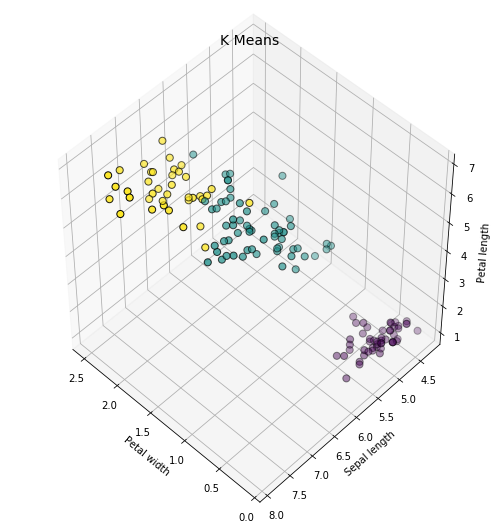

In [9]:
# Code from link below:
# https://towardsdatascience.com/clustering-based-unsupervised-learning-8d705298ae51
#3D plot of iris dataset
iris = datasets.load_iris()
X = iris.data
#KMeans
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

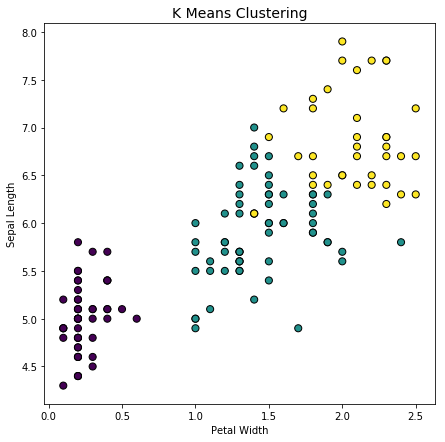

In [10]:
#Plotting
fig = plt.figure(1, figsize=(7,7))
plt.scatter(X[:, 3], X[:, 0], 
          c=labels.astype(np.float), edgecolor="k", s=50)
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.title("K Means Clustering", fontsize=14)

In [11]:
# kmeans clustering with 3 clusters on Iris dataset
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

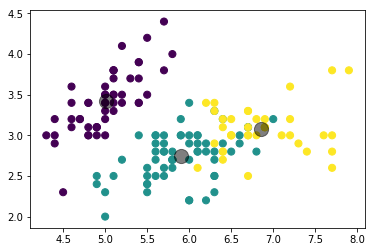

In [12]:
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Elbow

In [13]:
distortion = []
ks = range(2,12)
for k in ks:
    print(k)
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    print(km.inertia_)
    print()
    distortion.append(km.inertia_)
    
distortion

2
152.368706477

3
78.9408414261

4
57.3178732143

5
46.5355820513

6
38.9309630497

7
34.3903518444

8
30.0775309984

9
28.1374413994

10
26.5311870134

11
24.4672335752



[152.36870647733906,
 78.940841426146022,
 57.317873214285711,
 46.535582051282049,
 38.930963049671746,
 34.390351844354477,
 30.077530998389697,
 28.137441399392202,
 26.531187013427292,
 24.467233575248287]

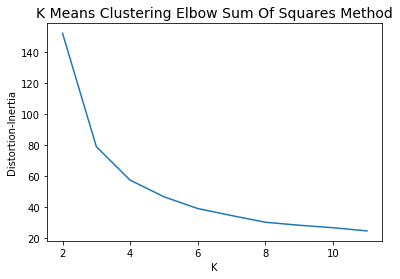

In [14]:
#plt.scatter(ks,distortion)
plt.plot(ks,distortion)
plt.xlabel("K")
plt.ylabel("Distortion-Inertia")
plt.title("K Means Clustering Elbow Sum Of Squares Method", fontsize=14)

## Choosing K: The Silhouette Method

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = range(2,11)
silhouette_scores = []
for n_clusters in range_n_clusters:
   
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.680813620271
For n_clusters = 3 The average silhouette_score is : 0.552591944521
For n_clusters = 4 The average silhouette_score is : 0.497825690075
For n_clusters = 5 The average silhouette_score is : 0.488517550854
For n_clusters = 6 The average silhouette_score is : 0.371218050256
For n_clusters = 7 The average silhouette_score is : 0.360059799443
For n_clusters = 8 The average silhouette_score is : 0.36037497064
For n_clusters = 9 The average silhouette_score is : 0.313931023397
For n_clusters = 10 The average silhouette_score is : 0.308014583084


In [16]:
silhouette_scores

[0.68081362027135073,
 0.55259194452136762,
 0.49782569007544936,
 0.48851755085386317,
 0.37121805025641585,
 0.36005979944336086,
 0.36037497064006435,
 0.31393102339656748,
 0.30801458308379598]

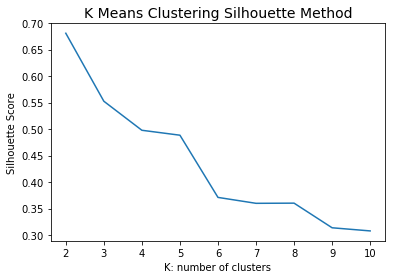

In [17]:
plt.plot(range_n_clusters,silhouette_scores)
plt.xlabel("K: number of clusters")
plt.ylabel("Silhouette Score")
plt.title("K Means Clustering Silhouette Method", fontsize=14)

In [18]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation().fit(X)
clustering.labels_
af_labels = clustering.labels_

In [19]:
af_labels

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 4, 3, 2,
       3, 4, 3, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 3, 2, 2, 2, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 6, 4, 6, 6, 6, 5, 3, 5, 6, 5, 6, 4, 6, 4, 4,
       6, 6, 5, 5, 4, 6, 4, 5, 4, 6, 6, 4, 4, 6, 6, 5, 5, 6, 4, 4, 5, 6, 6,
       4, 6, 6, 6, 4, 6, 6, 6, 4, 6, 6, 4])

In [20]:
# determine number of clusters obtained from AffinityPropagation using np.unique
print(len(np.unique(af_labels)))

7


In [21]:
#X

In [22]:
#df.head(3)

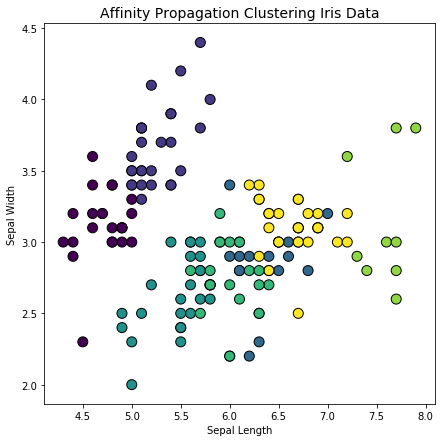

In [23]:
#Plotting with clusters 
fig = plt.figure(1, figsize=(7,7))
plt.scatter(X[:,0], X[:,1], 
          c=af_labels.astype(np.float), edgecolor="k", s=100)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Affinity Propagation Clustering Iris Data", fontsize=14)